#Import the Libraries 

In [1]:
import numpy as np
import pandas as pd

In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


C:\Users\welcome\Downloads\Dataset (1)\Dataset\fulfilment_center_info.csv
C:\Users\welcome\Downloads\Dataset (1)\Dataset\meal_info.csv
C:\Users\welcome\Downloads\Dataset (1)\Dataset\test.csv
C:\Users\welcome\Downloads\Dataset (1)\Dataset\train.csv


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from catboost import Pool


In [7]:
train = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\train.csv")
test = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\test.csv")
fulfilment_center = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\fulfilment_center_info.csv")
meal_info = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\meal_info.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [10]:
test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [11]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [13]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [14]:
train = pd.merge(train,fulfilment_center, on = 'center_id')
test = pd.merge(test,fulfilment_center, on = 'center_id')

train = pd.merge(train,meal_info, on = 'meal_id')
test = pd.merge(test,meal_info, on = 'meal_id')

In [15]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

# EDA

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='num_orders'>

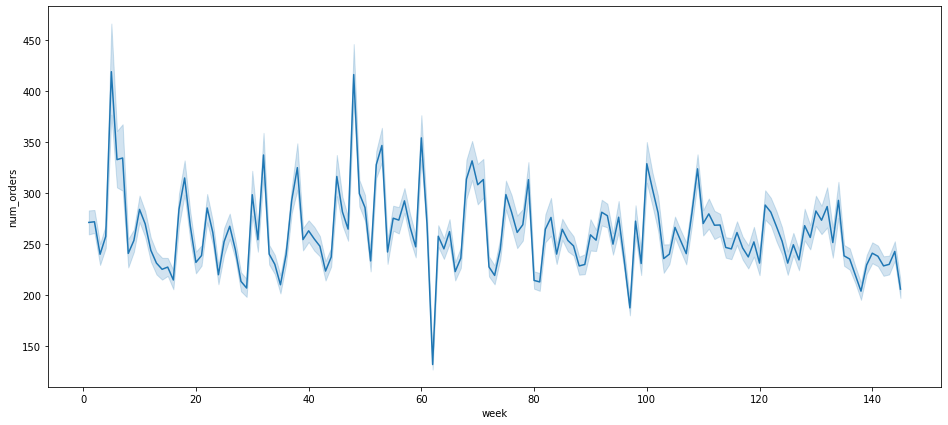

In [17]:
plt.figure(figsize = (16, 7))
sns.lineplot(train['week'], train['num_orders'])

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '17'),
  Text(5, 0, '20'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '32'),
  Text(13, 0, '34'),
  Text(14, 0, '36'),
  Text(15, 0, '39'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '43'),
  Text(19, 0, '50'),
  Text(20, 0, '51'),
  Text(21, 0, '52'),
  Text(22, 0, '53'),
  Text(23, 0, '55'),
  Text(24, 0, '57'),
  Text(25, 0, '58'),
  Text(26, 0, '59'),
  Text(27, 0, '61'),
  Text(28, 0, '64'),
  Text(29, 0, '65'),
  Text(30, 0, '66'),
  Text(31

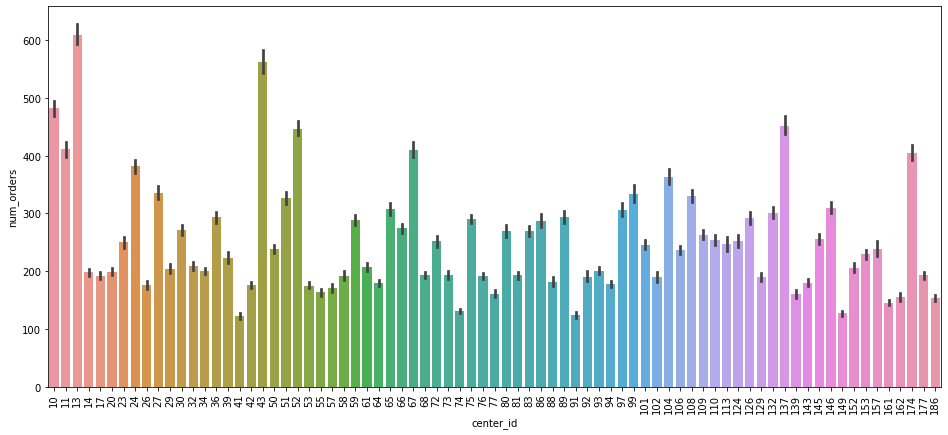

In [18]:
plt.figure(figsize = (16, 7))
sns.barplot(train['center_id'], train['num_orders'])
plt.xticks(rotation = 90)

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

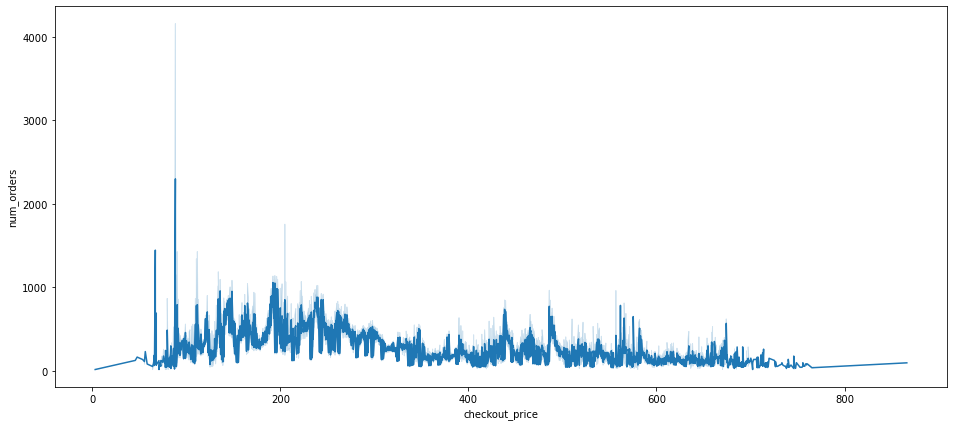

In [20]:
plt.figure(figsize = (16, 7))
sns.lineplot(train['checkout_price'], train['num_orders'])

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

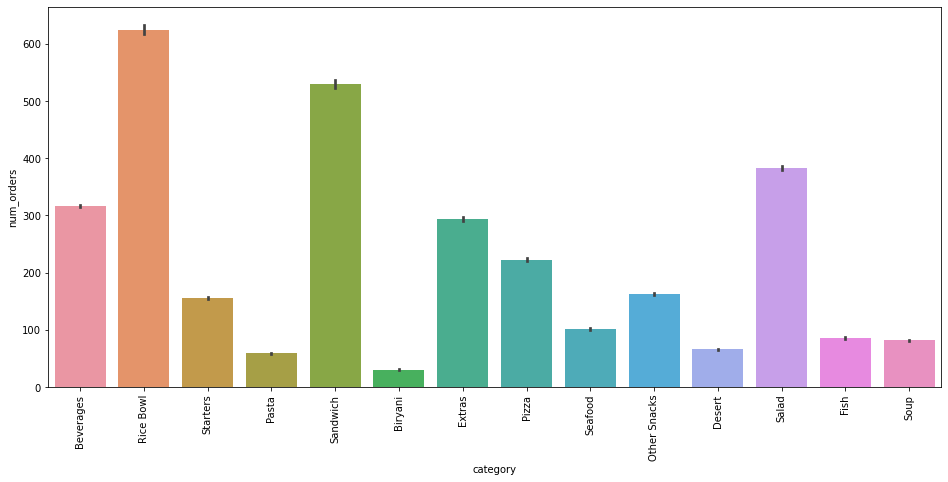

In [21]:
plt.figure(figsize = (16, 7))
sns.barplot(train['category'], train['num_orders'])
plt.xticks(rotation = '90')

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

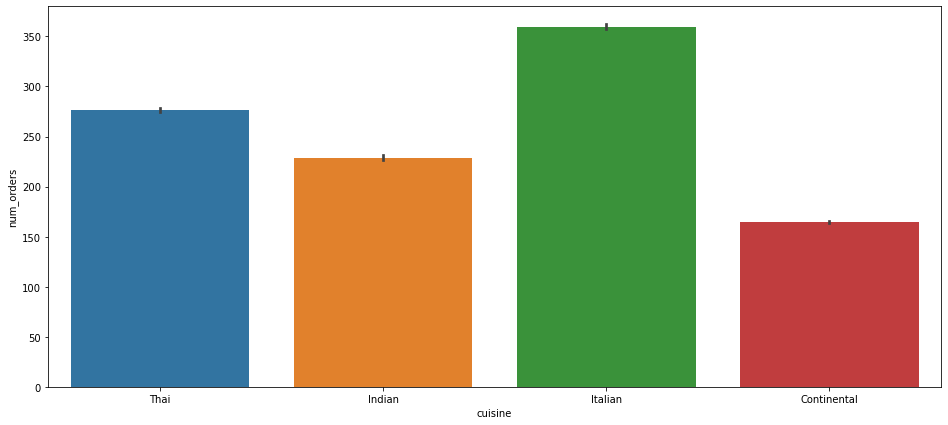

In [22]:
plt.figure(figsize = (16, 7))
sns.barplot(train['cuisine'], train['num_orders'])
#plt.xticks(rotation = '90')


C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region_code', ylabel='num_orders'>

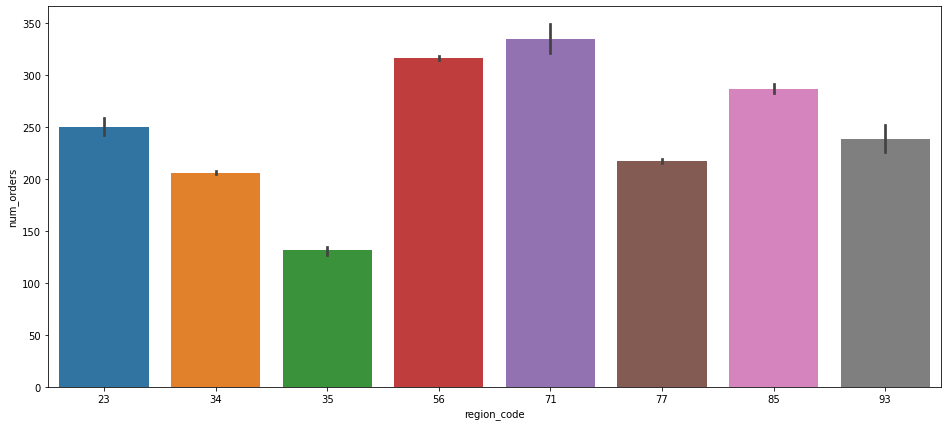

In [23]:
plt.figure(figsize = (16, 7))
sns.barplot(train['region_code'], train['num_orders'])
#plt.xticks(rotation = '90')

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0.9'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.4'),
  Text(4, 0, '2.7'),
  Text(5, 0, '2.8'),
  Text(6, 0, '2.9'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.2'),
  Text(9, 0, '3.4'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.6'),
  Text(12, 0, '3.7'),
  Text(13, 0, '3.8'),
  Text(14, 0, '3.9'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.1'),
  Text(17, 0, '4.2'),
  Text(18, 0, '4.4'),
  Text(19, 0, '4.5'),
  Text(20, 0, '4.6'),
  Text(21, 0, '4.7'),
  Text(22, 0, '4.8'),
  Text(23, 0, '5.0'),
  Text(24, 0, '5.1'),
  Text(25, 0, '5.3'),
  Text(26, 0, '5.6'),
  Text(27, 0, '6.3'),
  Text(28, 0, '6.7'),
  Text(29, 0, '7.0')])

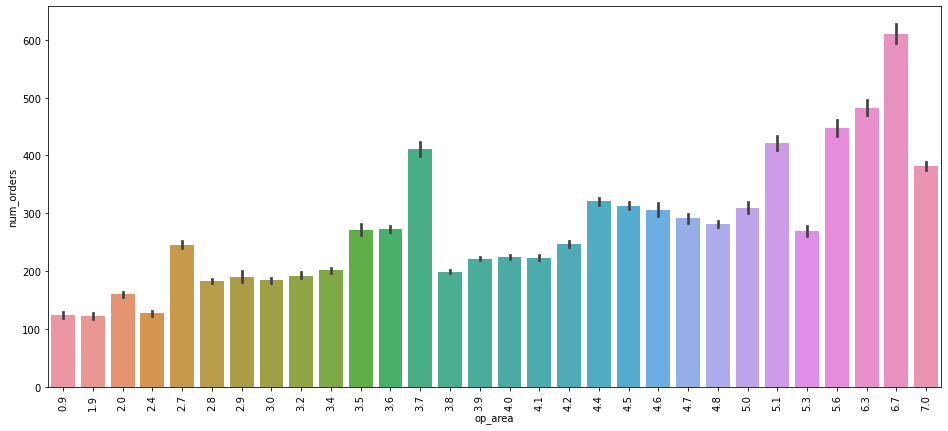

In [24]:
plt.figure(figsize = (16, 7))
sns.barplot(train['op_area'], train['num_orders'])
plt.xticks(rotation = '90')


C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

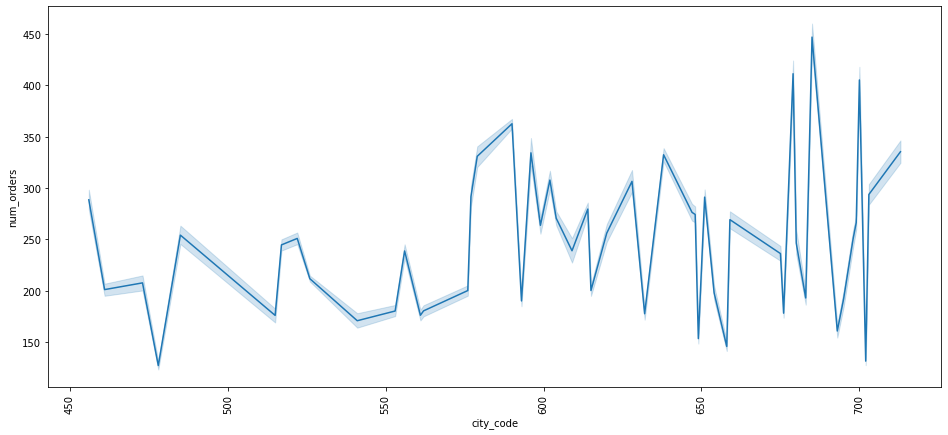

In [25]:
plt.figure(figsize = (16, 7))
sns.lineplot(train['city_code'], train['num_orders'])
plt.xticks(rotation = '90')


<AxesSubplot:xlabel='num_orders'>

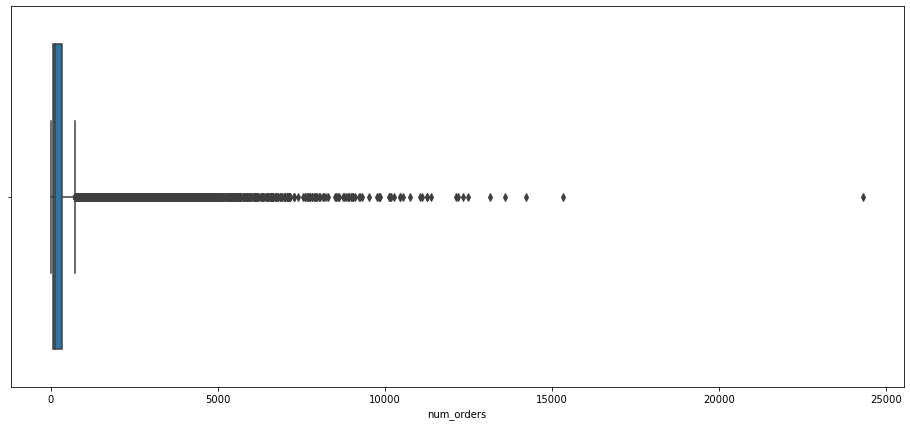

In [26]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'num_orders', data = train)


#Removing outliers from num_orders field

 

<AxesSubplot:xlabel='region_code'>

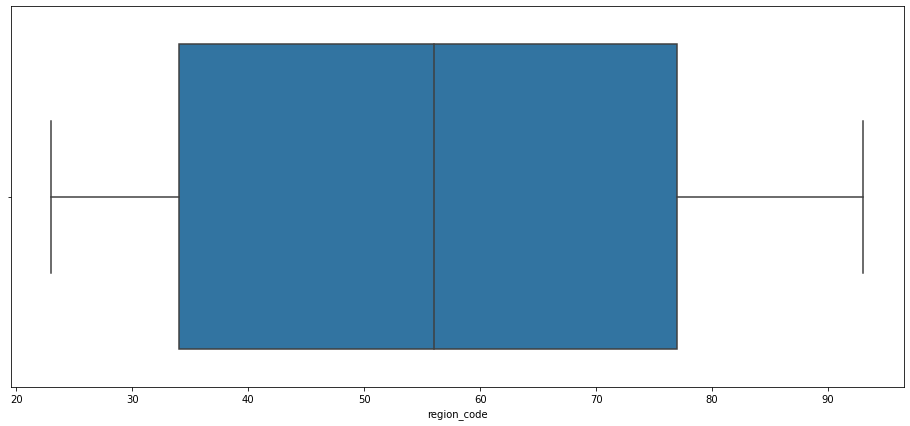

In [27]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'region_code', data = train)


<Figure size 1152x504 with 0 Axes>

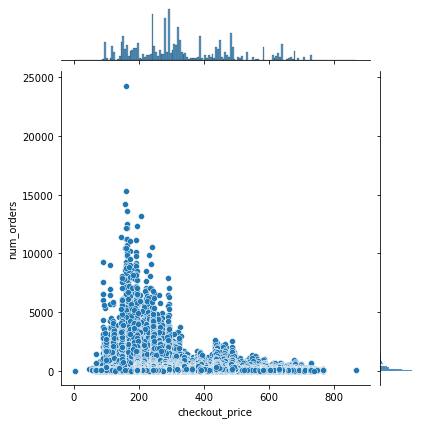

In [28]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'checkout_price', y = 'num_orders', data = train)


# We have removed outlier from check_out price and base price

<Figure size 1152x504 with 0 Axes>

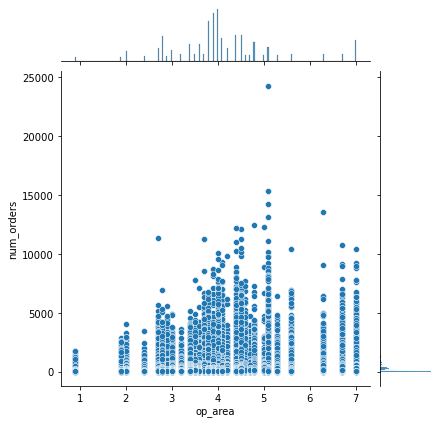

In [29]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'op_area', y = 'num_orders', data = train)

<Figure size 1152x504 with 0 Axes>

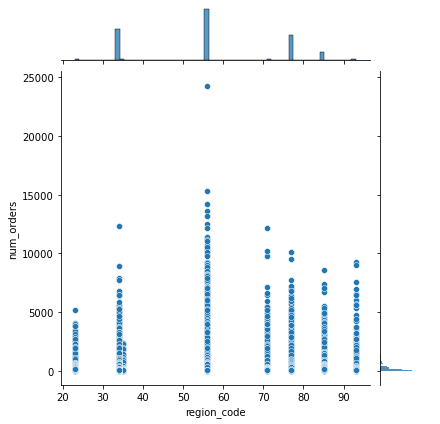

In [30]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'region_code', y = 'num_orders', data = train)

<Figure size 1152x504 with 0 Axes>

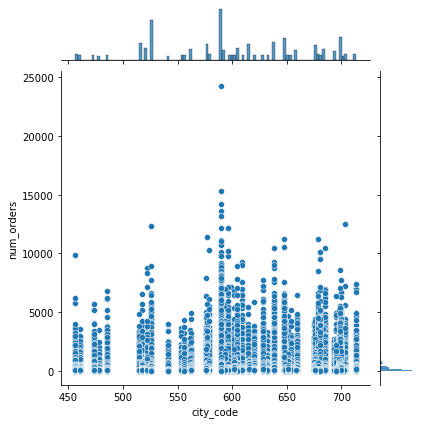

In [31]:
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'city_code', y = 'num_orders', data = train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

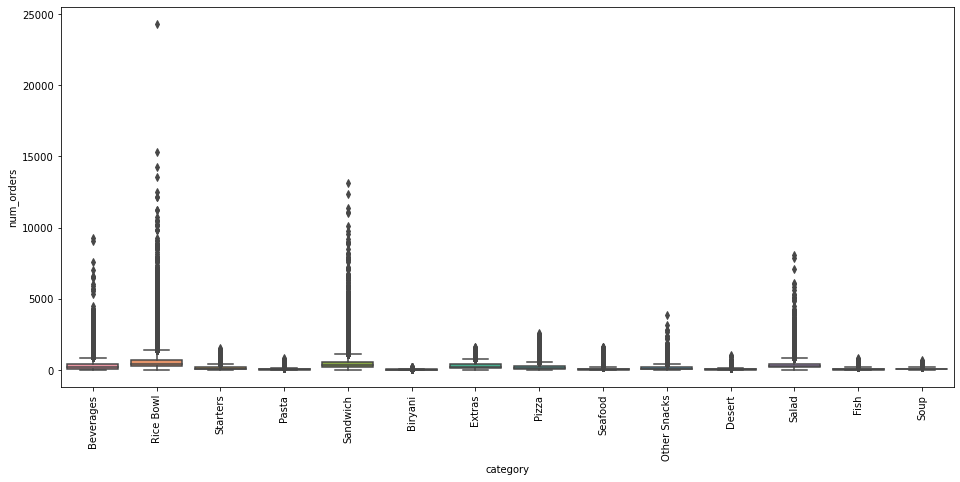

In [32]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'category', y = 'num_orders', data = train)
plt.xticks(rotation = 90)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Thai'),
  Text(1, 0, 'Indian'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Continental')])

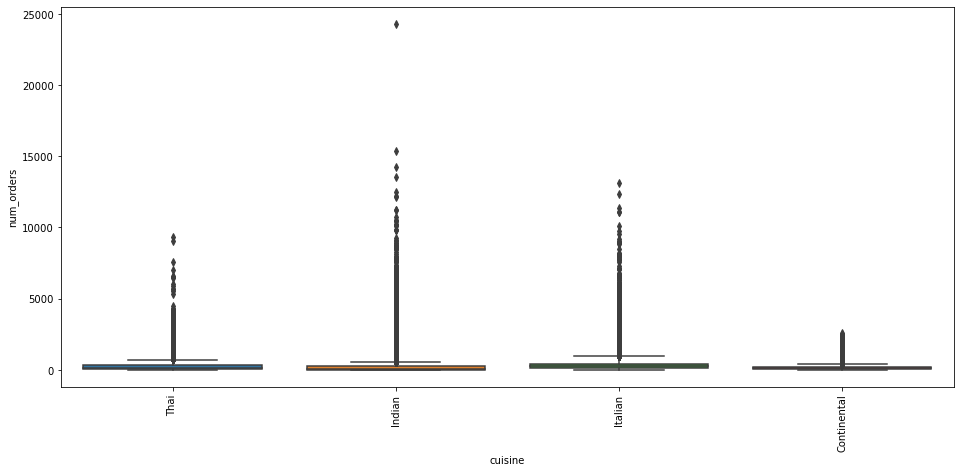

In [33]:
plt.figure(figsize = (16, 7))
sns.boxplot(x = 'cuisine',y = 'num_orders',data = train)
plt.xticks(rotation = 90)

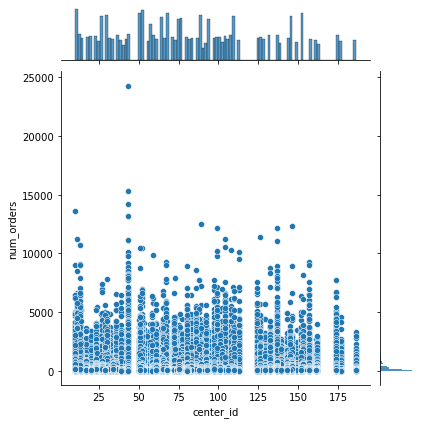

In [34]:
sns.jointplot(x = 'center_id', y = 'num_orders', data = train)

In [35]:
print("Total number of centers : ", train['center_id'].nunique())


Total number of centers :  77


In [36]:
print("Total Number of cities: ", train['city_code'].nunique())

Total Number of cities:  51


We have 77 stores in 51 cities, so some city have more than 1 center.

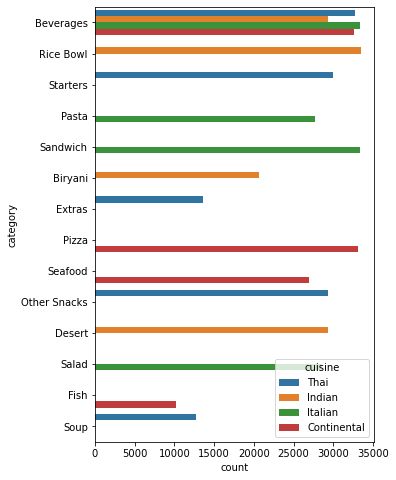

In [37]:
fig, ax = plt.subplots(figsize = (5, 8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax = ax)
plt.show()

In [38]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train), "center-meal pairs in train data")


There are 3597 center-meal pairs in train data


In [39]:
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test), "center-meal pairs in train data")


There are 3548 center-meal pairs in train data


In [40]:
# check if test set has any new center-mean pair or not
print("There are",len(set(center_meal_test) - set(center_meal_train)), "New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'73_1571', '92_2104', '73_2956'}


In [41]:
test[(test['center_id'] == 73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [42]:
test[(test['center_id'] == 92) & (test['meal_id'].isin([2104]))].shape[0]

2

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.

# Remove outlier


In [43]:
outlier_index = train[(train['num_orders'] > 15000)].index

In [44]:
train.drop(outlier_index, inplace = True)

# Feature Engineering

In [45]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [46]:
train['num_orders'] = np.log1p(train['num_orders'])


In [48]:

total_data = train.append(test).reset_index(drop = True)[train.columns]

C:\Users\welcome\AppData\Local\Temp\ipykernel_16308\966594478.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_data = train.append(test).reset_index(drop = True)[train.columns]


In [50]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop = True)


In [51]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])


In [52]:
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']


In [53]:
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


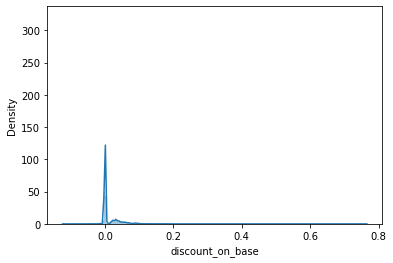

In [54]:
sns.distplot(total_data['discount_on_base'], bins = 500)
plt.show()

In [56]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)


In [57]:
for _, r in total_data.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    total_data.loc[(total_data['center_id'] == r['center_id']) & (total_data['meal_id'] == r['meal_id']) & (total_data['week'] == r['week']), 'price_last_curr_diff'] = total_data[(total_data['center_id'] == r['center_id']) & (total_data['meal_id'] == r['meal_id']) & (total_data['week'] != r['week'])]['price_last_curr_diff'].mean()
total_data['price_last_curr_diff'] = total_data['price_last_curr_diff'].fillna(0)


Some functions to create aggregated, rolling mean/median, and exponentially weighted features.

In [58]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale = 1.6, size = (len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha = [0.9], shift = [1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha = a).mean().values
    return df

In [59]:
# Creating num_orders lag, rolling mean, rolling median, ohe features of the above train set
total_data = create_sales_lag_feats(total_data, gpby_cols = ['center_id','meal_id'], target_col = 'num_orders', 
                               lags = [10, 11, 12])

total_data = create_sales_ewm_feats(total_data, gpby_cols = ['center_id', 'meal_id'], 
                               target_col = 'num_orders',
                               alpha=[0.5], 
                               shift=[10,11,12,13,14,15])


In [60]:
total_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,price_last_curr_diff,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
0,1436842,1,10,1062,5.206147,5.206147,0,0,6.763885,590,...,0.000086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1205013,2,10,1062,5.216890,5.211451,0,0,6.663133,590,...,-0.002064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1447751,3,10,1062,5.222300,5.211451,0,0,6.747587,590,...,-0.001037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1014968,4,10,1062,5.211451,5.216890,0,0,7.092574,590,...,0.002077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003563,5,10,1062,5.217053,5.206147,0,0,6.865891,590,...,-0.001075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
### Center count features ###
gdf = total_data.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "week"], how = "left")

gdf = total_data.groupby(["center_id", "category"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "center_cat_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "category"], how = "left")

gdf = total_data.groupby(["center_id", "category", "week"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "week", "center_cat_week_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "category", "week"], how = "left")

gdf = total_data.groupby(["center_id", "cuisine"])["id"].count().reset_index()
gdf.columns = ["center_id", "cuisine", "center_cui_count"]
total_data = pd.merge(total_data,gdf, on = ["center_id", "cuisine"], how = "left")

In [62]:
### Meal count features ###
gdf = total_data.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
total_data = pd.merge(total_data,gdf, on = ["meal_id"], how = "left")

gdf = total_data.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on = ["region_code", "meal_id"], how = "left")

gdf = total_data.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["meal_id", "week"], how = "left")

gdf =total_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["center_type", "meal_id", "week"], how = "left")

gdf = total_data.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["region_code", "meal_id", "week"], how = "left")

gdf =total_data.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
total_data = pd.merge(total_data,gdf, on = ["city_code", "meal_id", "week"], how = "left")

In [63]:
### Price rank ###

total_data["meal_price_rank"] = total_data.groupby("meal_id")["checkout_price"].rank()
total_data["meal_city_price_rank"] = total_data.groupby(["meal_id", "city_code"])["checkout_price"].rank()
total_data["meal_region_price_rank"] = total_data.groupby(["meal_id", "region_code"])["checkout_price"].rank()
total_data["meal_week_price_rank"] = total_data.groupby(["meal_id", "week"])["checkout_price"].rank()

total_data["center_price_rank"] = total_data.groupby("center_id")["checkout_price"].rank()
total_data["center_week_price_rank"] = total_data.groupby(["center_id", "week"])["checkout_price"].rank()
total_data["center_cat_price_rank"] = total_data.groupby(["center_id", "category"])["checkout_price"].rank()

In [64]:
### Week features ###

gdf = total_data.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean", "meal_price_std"]
total_data = pd.merge(total_data,gdf, on = ["meal_id"], how = "left")

gdf = total_data.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean", "disc_price_std"]
total_data = pd.merge(total_data,gdf, on = ["meal_id"], how = "left")

gdf = total_data.groupby(["city_code","meal_id", "week"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["city_code", "meal_id", "week", "meal_price2_min", "meal_price2_max", "meal_price2_mean", "meal_price2_std"]
total_data= pd.merge(total_data,gdf, on = ["city_code", "meal_id", "week"], how = "left")

gdf = total_data.groupby(["city_code", "category"])["checkout_price"].agg(["mean", "std"]).reset_index()
gdf.columns = ["city_code", "category", "meal_price3_mean", "meal_price3_std"]
total_datal = pd.merge(total_data,gdf, on = ["city_code", "category"], how = "left")

In [65]:
total_data['center_id'] = total_data['center_id'].astype(np.object)
total_data['meal_id'] = total_data['meal_id'].astype(np.object)
total_data['region_code'] = total_data['region_code'].astype(np.object)
total_datal['city_code'] = total_data['city_code'].astype(np.object)

C:\Users\welcome\AppData\Local\Temp\ipykernel_16308\19819836.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_data['center_id'] = total_data['center_id'].astype(np.object)
C:\Users\welcome\AppData\Local\Temp\ipykernel_16308\19819836.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  total_data['meal_id'] = total_data['meal_id'].astype(np.object)
C:\Users\welcome\AppData\Local\Temp\ipykernel_16308\19819836.py:3: DeprecationWarning: `np.object` is a deprecated alias

In [66]:
train_data = total_data.loc[total_data['train_or_test'] == 'train', :]
test_data = total_data.loc[total_data['train_or_test'] == 'test', :]

In [67]:
center_meal_mean = train_data.groupby(['center_id', 'meal_id'])['num_orders'].mean()
center_meal_mean = center_meal_mean.reset_index()
center_meal_mean = center_meal_mean.rename(columns = {'num_orders':'avg_orders'})
train_data = pd.merge(train_data,center_meal_mean, how = 'left', left_on = ['center_id', 'meal_id'], right_on = ['center_id', 'meal_id'])
test_data = pd.merge(test_data,center_meal_mean, how = 'left', left_on = ['center_id', 'meal_id'], right_on = ['center_id', 'meal_id'])
center_mean = train_data.groupby('center_id')['num_orders'].mean()
center_mean = center_mean.reset_index()
center_mean = center_mean.rename(columns = {'num_orders':'avg_center'})
train_data = pd.merge(train_data,center_mean, how = 'left', left_on = ['center_id'], right_on = ['center_id'])
test_data = pd.merge(test_data,center_mean, how = 'left', left_on = ['center_id'], right_on = ['center_id'])
meal_mean = train_data.groupby('meal_id')['num_orders'].mean()
meal_mean = meal_mean.reset_index()
meal_mean = meal_mean.rename(columns = {'num_orders':'avg_meal'})
train_data = pd.merge(train_data, meal_mean,how = 'left',left_on = ['meal_id'], right_on = ['meal_id'])
test_data = pd.merge(test_data, meal_mean,how = 'left',left_on = ['meal_id'], right_on = ['meal_id'])

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456545
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  object 
 3   meal_id                    456546 non-null  object 
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  object 
 11  center_type                456546 non-null  object 
 12  op_area                    456546 non-null  float64
 13  category                   45

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32573 non-null  int64  
 1   week                       32573 non-null  int64  
 2   center_id                  32573 non-null  object 
 3   meal_id                    32573 non-null  object 
 4   checkout_price             32573 non-null  float64
 5   base_price                 32573 non-null  float64
 6   emailer_for_promotion      32573 non-null  int64  
 7   homepage_featured          32573 non-null  int64  
 8   num_orders                 0 non-null      float64
 9   city_code                  32573 non-null  int64  
 10  region_code                32573 non-null  object 
 11  center_type                32573 non-null  object 
 12  op_area                    32573 non-null  float64
 13  category                   32573 non-null  obj

# Catboost Model

In [70]:

avoid_column = ['id', 'num_orders', 'train_or_test']

In [71]:
features = [col for col in test_data.columns if col not in avoid_column]

In [72]:

features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5',
 'center_week_count',
 'center_cat_count',
 'center_cat_week_count',
 'center_cui_count',
 'meal_count',
 'region_meal_count',
 'meal_week_count',
 'type_meal_week_count',
 'region_meal_week_count',
 'city_meal_week_count',
 'meal_price_rank',
 'meal_city_price_rank',
 'meal_region_price_rank',
 'meal_week_price_rank',
 'center_price_rank',
 'center_week_price_rank',
 'center_cat_price_rank',
 'meal_price_min',
 'meal_price_max',
 'meal_price_mean',
 'meal_price_std',
 'disc_price_min

In [73]:
categorical_features_indices = np.where(train_data[features].dtypes == 'object')[0]
categorical_features_indices

array([ 1,  2,  8,  9, 11, 12], dtype=int64)

In [74]:
model = CatBoostRegressor(
    iterations = 2000, 
    learning_rate = 0.02, 
    max_depth = 8, 
    l2_leaf_reg = 10, 
    loss_function = 'RMSE',
    random_seed = 22,
    od_type = 'Iter',
    od_wait = 25,
    verbose = 100,
    use_best_model = True
    )

In [76]:
errcb = []
y_pred_test = []

fold = KFold(n_splits = 5,shuffle = True, random_state = 22)

for train_index, test_index in fold.split(train_data[features],train_data['num_orders']):
    X_train, X_valid = train_data[features].iloc[train_index], train_data[features].iloc[test_index]
    y_train, y_valid = train_data['num_orders'][train_index],train_data['num_orders'][test_index]
    model.fit(X_train,y_train,
              cat_features = categorical_features_indices,
              eval_set = (X_valid, y_valid),
              early_stopping_rounds = 300,
              verbose = 100)
    preds = model.predict(X_valid)
    print("err: ", np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
    p = model.predict(test_data[features])
    y_pred_test.append(p)

0:	learn: 1.1847118	test: 1.1859358	best: 1.1859358 (0)	total: 540ms	remaining: 18m
100:	learn: 0.5388927	test: 0.5405548	best: 0.5405548 (100)	total: 1m 43s	remaining: 32m 23s
200:	learn: 0.4975678	test: 0.4993660	best: 0.4993660 (200)	total: 3m 51s	remaining: 34m 32s
300:	learn: 0.4869577	test: 0.4890639	best: 0.4890639 (300)	total: 5m 44s	remaining: 32m 26s
400:	learn: 0.4807092	test: 0.4831736	best: 0.4831736 (400)	total: 7m 31s	remaining: 30m
500:	learn: 0.4758229	test: 0.4786431	best: 0.4786431 (500)	total: 9m 15s	remaining: 27m 41s
600:	learn: 0.4719984	test: 0.4751812	best: 0.4751812 (600)	total: 10m 40s	remaining: 24m 50s
700:	learn: 0.4688278	test: 0.4723566	best: 0.4723566 (700)	total: 11m 51s	remaining: 21m 57s
800:	learn: 0.4658370	test: 0.4696964	best: 0.4696964 (800)	total: 13m 4s	remaining: 19m 33s
900:	learn: 0.4634050	test: 0.4676266	best: 0.4676266 (900)	total: 14m 16s	remaining: 17m 24s
1000:	learn: 0.4614239	test: 0.4659664	best: 0.4659664 (1000)	total: 15m 20s	rem

In [77]:
model.fit(X = train_data[features], y = train_data['num_orders'], cat_features = categorical_features_indices,
          eval_set = (X_valid, y_valid), verbose = 100)


0:	learn: 1.1847998	test: 1.1856397	best: 1.1856397 (0)	total: 2.35s	remaining: 1h 18m 19s
100:	learn: 0.5389422	test: 0.5383869	best: 0.5383869 (100)	total: 2m 40s	remaining: 50m 11s
200:	learn: 0.4977675	test: 0.4972062	best: 0.4972062 (200)	total: 5m 14s	remaining: 46m 58s
300:	learn: 0.4870662	test: 0.4864360	best: 0.4864360 (300)	total: 7m 46s	remaining: 43m 53s
400:	learn: 0.4804700	test: 0.4797224	best: 0.4797224 (400)	total: 10m 17s	remaining: 41m 3s
500:	learn: 0.4758407	test: 0.4749925	best: 0.4749925 (500)	total: 12m 50s	remaining: 38m 24s
600:	learn: 0.4722145	test: 0.4712792	best: 0.4712792 (600)	total: 15m 19s	remaining: 35m 39s
700:	learn: 0.4689536	test: 0.4679581	best: 0.4679581 (700)	total: 17m 49s	remaining: 33m 1s
800:	learn: 0.4661327	test: 0.4650959	best: 0.4650959 (800)	total: 20m 23s	remaining: 30m 30s
900:	learn: 0.4637725	test: 0.4626768	best: 0.4626768 (900)	total: 22m 53s	remaining: 27m 54s
1000:	learn: 0.4616046	test: 0.4604805	best: 0.4604805 (1000)	total:

In [78]:
pred = model.predict(test_data[features])

In [79]:
pred = (np.exp(pred) - 1)

In [80]:
submission = pd.DataFrame({'id':test['id'],'num_orders':pred})
submission = submission[['id','num_orders']]
submission.head()

,id,num_orders
0,1028232,1005.142912
1,1262649,1022.366382
2,1453211,1001.281093
3,1262599,750.610429
4,1495848,992.388724


In [81]:
submission.to_csv('catboost_1.csv', index = False)


In [82]:
feature_score = pd.DataFrame(list(zip(train_data[features].dtypes.index, model.get_feature_importance(Pool(train_data[features], label=train_data['num_orders'], cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by = 'Score', ascending = False, inplace = False, 
                                          kind = 'quicksort', na_position = 'last')

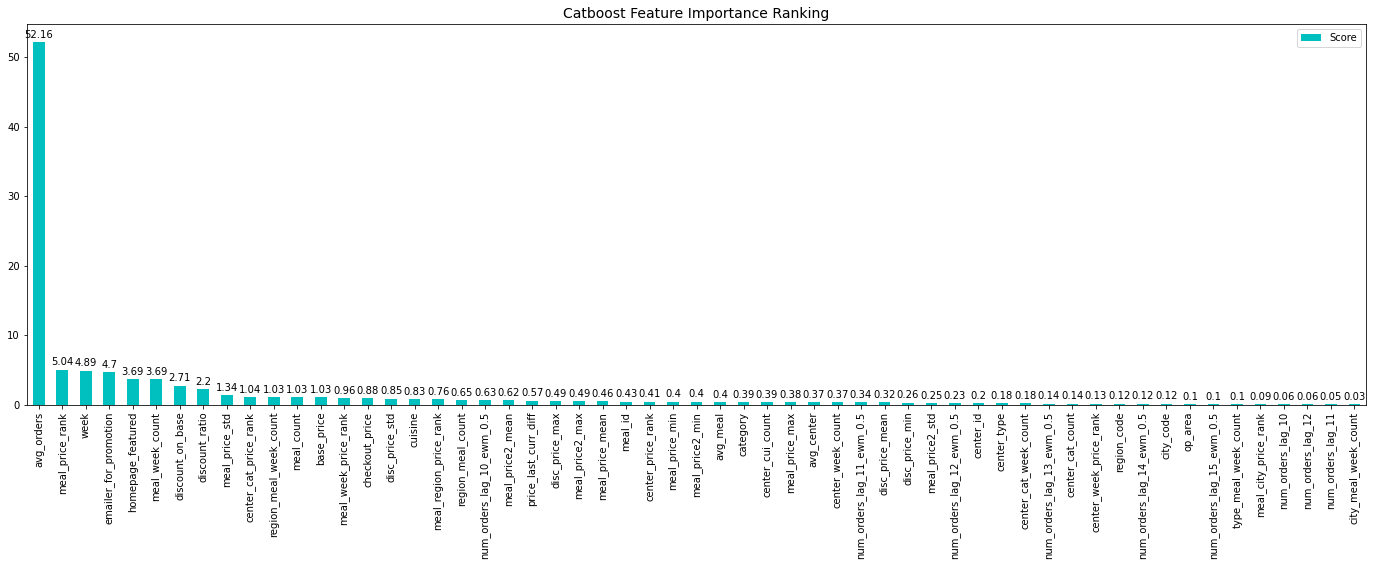

In [83]:
plt.rcParams["figure.figsize"] = (24,7)
ax = feature_score.plot('Feature', 'Score', kind = 'bar', color = 'c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha = 'center', va = 'bottom')

plt.show()